In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization Lab**


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-05-31 20:18:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  41.6MB/s    in 0.8s    

2023-05-31 20:18:13 (41.6 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [3]:
# importing my own data output of EDA stage
Df = pd.read_csv("/content/drive/MyDrive/Business Analyst Projects/IBM - stack over flow survey project/week3(EDA)/EDA file.csv")

In [ ]:
langwprkedDF = pd.read_csv("/content/sample_data/LanguageWorkedWith.csv")

In [ ]:
ff = langwprkedDF.merge(Df, on = 'Respondent' )[["Country","Respondent","LanguageWorkedWith_x"]]
ff.pivot_table(index="LanguageWorkedWith_x", aggfunc = 'count', margins = True, sort = False)
li = ff.isin(["JavaScript","HTML/CSS","Python","SQL","TypeScript","C#","Bash/Shell/PowerShell","Java","C++","PHP"])['LanguageWorkedWith_x']
sdc=ff[li]['Country'] == "Australia"
ff[ff[li]['Country'] == "Australia"]
ff[li][sdc]

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


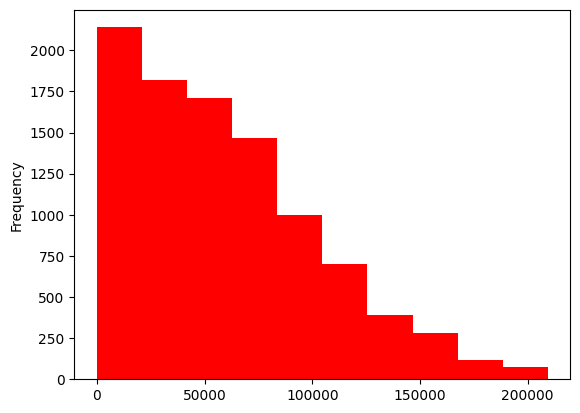

<Figure size 800x480 with 0 Axes>

In [5]:
# your code goes here
Df['ConvertedComp'].plot(kind ='hist')

plt.hist(Df['ConvertedComp'], color= 'red')
#plt.figure(figsize=(10,6))
plt.figure().set_figwidth(8)
plt.show()

<Axes: ylabel='Frequency'>

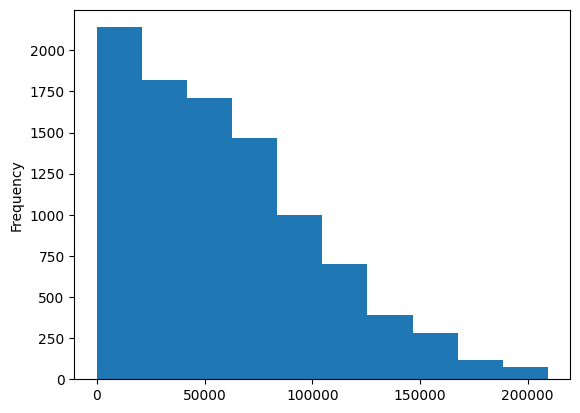

In [7]:
Df['ConvertedComp'].plot(kind ='hist')

### Box Plots


Plot a box plot of `Age.`


<Axes: >

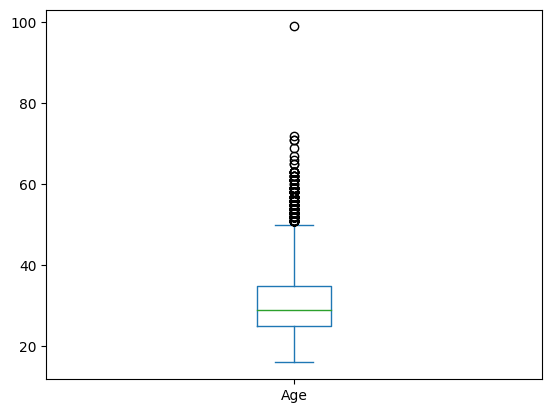

In [8]:
# your code goes here
Df['Age'].plot(kind ='box')


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<ipython-input-9-db31fa510518>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.corr()


,Respondent,CompTotal,WorkWeekHrs,ConvertedComp,CodeRevHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,-0.013490,-0.015314,0.010878,0.004621,0.004041,0.000426
CompTotal,-0.013490,1.000000,0.003510,-0.063561,0.007063,0.006970,0.863228
WorkWeekHrs,-0.015314,0.003510,1.000000,0.034351,0.026517,0.036518,0.005523
ConvertedComp,0.010878,-0.063561,0.034351,1.000000,-0.088934,0.401821,-0.086286
CodeRevHrs,0.004621,0.007063,0.026517,-0.088934,1.000000,-0.020469,0.012747
Age,0.004041,0.006970,0.036518,0.401821,-0.020469,1.000000,-0.005238
NormalizedAnnualCompensation,0.000426,0.863228,0.005523,-0.086286,0.012747,-0.005238,1.000000


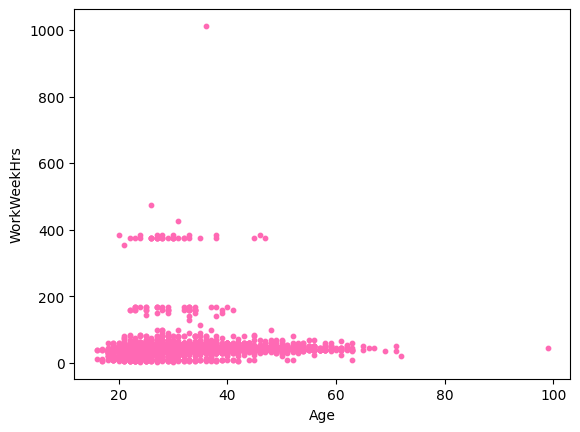

In [9]:
# your code goes here

Df.plot(kind = "scatter", x= "Age", y = 'WorkWeekHrs', s = 10 , c = 'hotpink')
Df.corr()


<Axes: xlabel='Age', ylabel='ConvertedComp'>

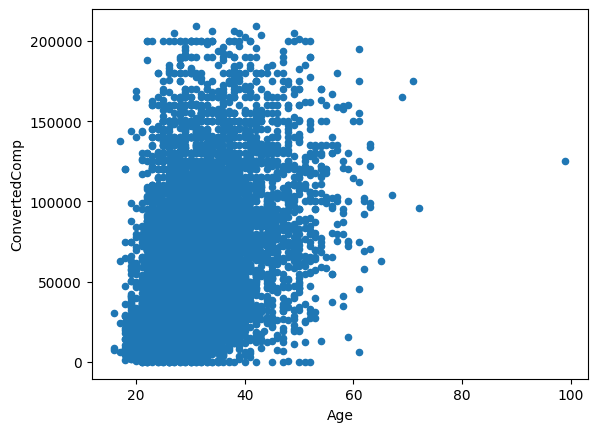

In [10]:
# i saw  okay realtionship  corelation in age vs ConvertedComp lets see its graph
Df.plot(kind = "scatter", x= "Age", y = 'ConvertedComp')

<Axes: xlabel='Age', ylabel='NormalizedAnnualCompensation'>

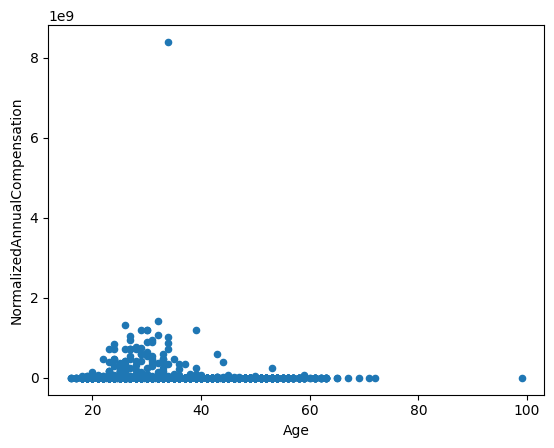

In [11]:
#
Df.plot(kind = "scatter", x= "Age", y = 'NormalizedAnnualCompensation')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


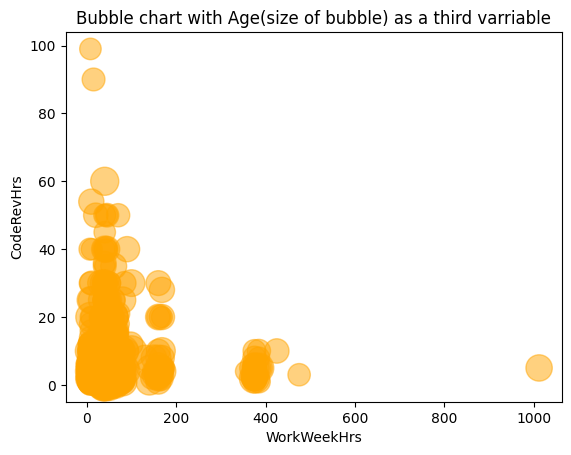

In [12]:
# your code goes here

x= Df["WorkWeekHrs"]
y= Df["CodeRevHrs"]
Age  = Df['Age']
plt.scatter(x, y, alpha = 0.5,  color = "orange", s = Age*10)
plt.xlabel("WorkWeekHrs")
plt.ylabel("CodeRevHrs")
plt.title("Bubble chart with Age(size of bubble) as a third varriable")

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [13]:
# your code goes here
Data_df = pd.DataFrame(columns = ['Respondent', 'Database'])
LoopDf = Df['DatabaseDesireNextYear'].str.split(';')
LoopDf.dropna(inplace = True)
row = 0
for i in LoopDf:
 for k in i:
  Data_df = Data_df.append({'Respondent': Df['Respondent'][row], 'Database': k}, ignore_index=True)
 row += 1


# Data_df.to_csv("DatabaseWished_nextYear.csv", index = False)



Streaming output truncated to the last 5000 lines.
<ipython-input-13-b98643044ccc>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_df = Data_df.append({'Respondent': Df['Respondent'][row], 'Database': k}, ignore_index=True)
<ipython-input-13-b98643044ccc>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_df = Data_df.append({'Respondent': Df['Respondent'][row], 'Database': k}, ignore_index=True)
<ipython-input-13-b98643044ccc>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_df = Data_df.append({'Respondent': Df['Respondent'][row], 'Database': k}, ignore_index=True)
<ipython-input-13-b98643044ccc>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

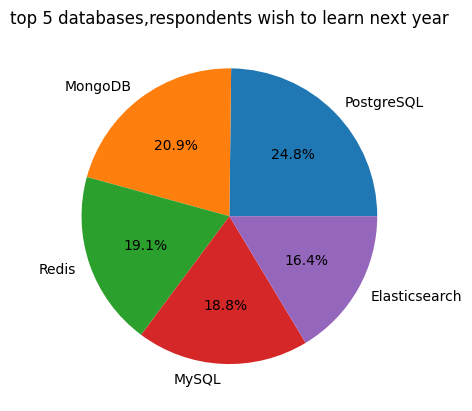

In [14]:
# now pieChart
Top5 = Data_df['Database'].value_counts().head(5)
Top5.values
plt.pie(Top5.values, labels = Top5.index , autopct = "%1.1f%%" )
plt.title('top 5 databases,respondents wish to learn next year')
plt.show()




In [ ]:
# In the list of most popular languages respondents wish to learn next year, what is the rank of Python?
LangData_df = pd.DataFrame(columns = ['Respondent', 'Language'])
LangloopDf = Df['LanguageDesireNextYear'].str.split(';')
LangloopDf.dropna(inplace = True)
row = 0
for i in LangloopDf:
 for k in i:
  LangData_df = LangData_df.append({'Respondent': Df['Respondent'][row], 'Language': k}, ignore_index=True)
 row += 1

LangData_df
# LangData_df.to_csv("LanguageWished_nextYear.csv", index =False)


In [ ]:
# now top language wish to learn graph
Ranks = LangData_df['Language'].value_counts().head(10)
Lang_rank = Ranks.rank()
plt.barh(width = Lang_rank.values, y = Lang_rank.index )
plt.title('top 10 Language,respondents wish to learn next year')
plt.show()



JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
Name: Language, dtype: int64

In [ ]:
# How many respondents indicated that they currently work with 'SQL'?
LangworkedData_df = pd.DataFrame(columns = ['Respondent', 'Language'])
LangworkedloopDf = Df['LanguageDesireNextYear'].str.split(';')
LangworkedloopDf.dropna(inplace = True)
row = 0
for i in LangworkedloopDf:
 for k in i:
  LangworkedData_df = LangworkedData_df.append({'Respondent': Df['Respondent'][row], 'Language': k}, ignore_index=True)
 row += 1

LangworkedData_df
# LangworkedData_df.to_csv('Language worked.csv', index = False)





Lang_worked_Count = LangData_df['Language'].value_counts()
Lang_worked_Count.loc['SQL']
# OR
Lang_worked_Count.iloc[3]




In [ ]:
# How many respondents indicated that they work on 'MySQL' only?

Df[Df['DatabaseWorkedWith'] == "MySQL"]['DatabaseWorkedWith'].count()


474

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Axes: xlabel='Age'>

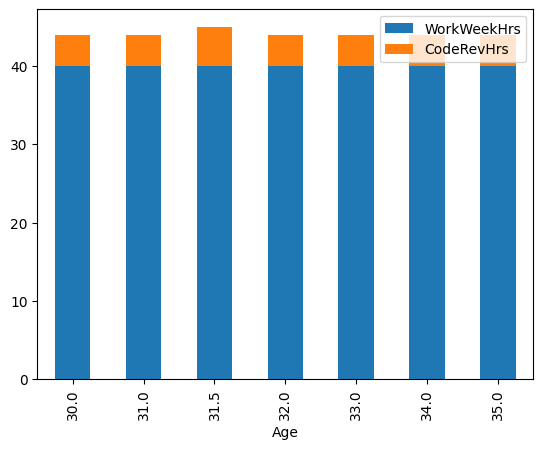

In [ ]:
stack_df = Df[Df['Age'].between(30,35)].groupby(['Age'])[['WorkWeekHrs', 'CodeRevHrs']].median().reset_index()
stack_df.plot(kind = 'bar', x= 'Age' , stacked = True, legend = True)



### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<ipython-input-13-5518a4132b9f>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  line_pl = Df.pivot_table(index = Df[Df['Age'].between(45,60)]['Age'], aggfunc = 'median')['ConvertedComp']


<Axes: xlabel='Age'>

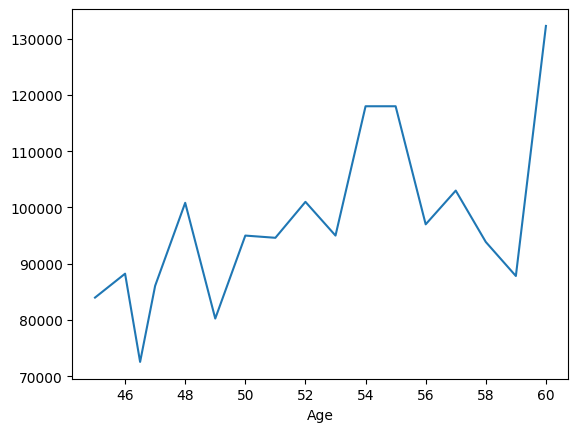

In [ ]:
# your code goes here
line_pl = Df.pivot_table(index = Df[Df['Age'].between(45,60)]['Age'], aggfunc = 'median')['ConvertedComp']
line_pl.plot(kind='line', x = line_pl.index, y= line_pl.values)


<ipython-input-76-4f930d2ef6b7>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  line_pl = Df.pivot_table(index = Df[Df['Age'].between(25,30)]['Age'], aggfunc = 'median')['ConvertedComp']


<Axes: xlabel='Age'>

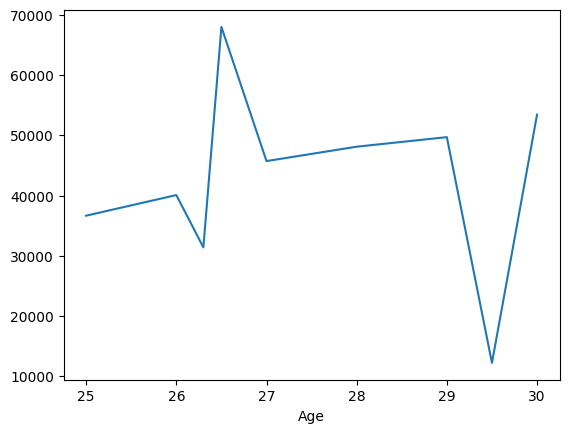

In [ ]:
# Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp?
line_pl = Df.pivot_table(index = Df[Df['Age'].between(25,30)]['Age'], aggfunc = 'median')['ConvertedComp']
line_pl.plot(kind='line', x = line_pl.index, y= line_pl.values)




### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


Text(0.5, 0, 'Respondent')

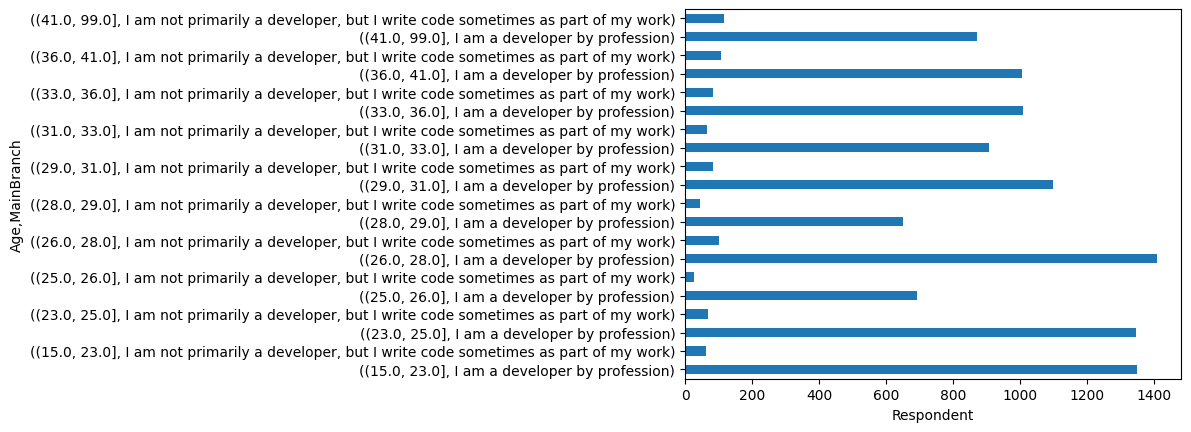

In [ ]:
# your code goes here
age_limit = pd.qcut(Df['Age'], 10 , precision =0)
type(age_limit)
main_pivot = Df.pivot_table(index = [age_limit,'MainBranch'], aggfunc = 'count')['Respondent']
main_pivot.plot(kind = 'barh')
plt.xlabel('Respondent')

In [ ]:
# Majority of the survey responders are?
DevType_Data_df = pd.DataFrame(columns = ['Respondent', 'DevType'])
DevType_loopDf = Df['DevType'].str.split(';')
DevType_loopDf.dropna(inplace = True)
row = 0
for i in DevType_loopDf:
 for k in i:
  DevType_Data_df = DevType_Data_df.append({'Respondent': Df['Respondent'][row], 'DevType': k}, ignore_index=True)
 row += 1



In [ ]:
Count_DevDf = DevType_Data_df['DevType'].value_counts()

labels = Count_DevDf.index
Count = Count_DevDf.values
Count_DevDf.plot(kind='barh', x=labels,y= Count)

plt.line(x= labels, y=Count)
plt.figure(figsize=(1000,30))
plt.show()

In [ ]:
# data which i take away for power bi presentation:
  # DataloopDf = Df["WebFrameDesireNextYear"].fillna('None')[0]

def data_collector(col_name):
  TableData_df = pd.DataFrame(columns = ['Respondent', col_name])
  DataloopDf = Df[col_name].fillna('None')
  DataloopDf = DataloopDf.str.split(';')
  row = 0
  for i in DataloopDf:
    for k in i:
      TableData_df = TableData_df.append({'Respondent': Df['Respondent'][row], col_name: k}, ignore_index=True)
    row += 1
  return TableData_df


data_collector("LanguageWorkedWith").to_csv("LanguageWorkedWith.csv")
data_collector("LanguageDesireNextYear").to_csv("LanguageDesireNextYear.csv")
data_collector("DatabaseWorkedWith").to_csv("DatabaseWorkedWith.csv")
data_collector("DatabaseDesireNextYear").to_csv("DatabaseDesireNextYear.csv")
data_collector("PlatformWorkedWith").to_csv("PlatformWorkedWith.csv")
data_collector("PlatformDesireNextYear").to_csv("PlatformDesireNextYear.csv")
data_collector("WebFrameWorkedWith").to_csv("WebFrameWorkedWith.csv")
data_collector("WebFrameDesireNextYear").to_csv("WebFrameDesireNextYear.csv")
data_collector("DevType").to_csv("DevType.csv")
data_collector("UndergradMajor").to_csv("UndergradMajor.csv")


dajdnj

dajdnj = pd.read_csv('/content/LanguageWorkedWith.csv')
dajdnj = dajdnj['LanguageWorkedWith'].value_counts()
dajdnj.to_csv("langwokUniqu.csv")


Streaming output truncated to the last 5000 lines.
<ipython-input-12-721ca972d6fd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TableData_df = TableData_df.append({'Respondent': Df['Respondent'][row], col_name: k}, ignore_index=True)
<ipython-input-12-721ca972d6fd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TableData_df = TableData_df.append({'Respondent': Df['Respondent'][row], col_name: k}, ignore_index=True)
<ipython-input-12-721ca972d6fd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TableData_df = TableData_df.append({'Respondent': Df['Respondent'][row], col_name: k}, ignore_index=True)
<ipython-input-12-721ca972d6fd>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

Close the database connection.


In [ ]:
conn.close()

NameError: ignored

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
